In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131258","key":"03e26e822f85937c720993918d2d78d7"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/road-sign-detection

 93% 203M/218M [00:05<00:00, 33.9MB/s]
100% 218M/218M [00:05<00:00, 38.5MB/s]


In [ ]:
!unzip road-sign-detection.zip

Archive:  road-sign-detection.zip
  inflating: annotations/road0.xml   
  inflating: annotations/road1.xml   
  inflating: annotations/road10.xml  
  inflating: annotations/road100.xml  
  inflating: annotations/road101.xml  
  inflating: annotations/road102.xml  
  inflating: annotations/road103.xml  
  inflating: annotations/road104.xml  
  inflating: annotations/road105.xml  
  inflating: annotations/road106.xml  
  inflating: annotations/road107.xml  
  inflating: annotations/road108.xml  
  inflating: annotations/road109.xml  
  inflating: annotations/road11.xml  
  inflating: annotations/road110.xml  
  inflating: annotations/road111.xml  
  inflating: annotations/road112.xml  
  inflating: annotations/road113.xml  
  inflating: annotations/road114.xml  
  inflating: annotations/road115.xml  
  inflating: annotations/road116.xml  
  inflating: annotations/road117.xml  
  inflating: annotations/road118.xml  
  inflating: annotations/road119.xml  
  inflating: annotations/road12.xm

In [ ]:
! ls -lrth 

total 219M
drwxr-xr-x 1 root root 4.0K Apr 19 14:23 sample_data
-rw-r--r-- 1 root root   63 Apr 26 05:59 kaggle.json
-rw-r--r-- 1 root root 219M Apr 26 05:59 road-sign-detection.zip
drwxr-xr-x 2 root root  32K Apr 26 05:59 annotations
drwxr-xr-x 2 root root  32K Apr 26 06:00 images


In [ ]:
img_path='images/'
img_size=128


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import cv2
import random

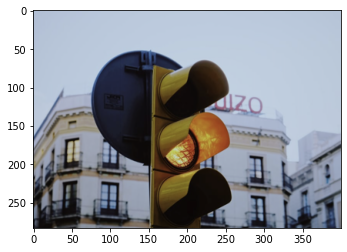

In [ ]:
plt.imshow(plt.imread('images/road1.png'))

In [ ]:
def img_to_data(path):
  data=[]
  for filename in sorted(os.listdir(path)):
    file=os.path.join(path,filename)
    # print(file)
    img=cv2.imread(file)
    img=cv2.resize(img,(img_size,img_size))
    data.append(np.array(img))

  return np.array(data)

In [ ]:
img_data=img_to_data(img_path)
len(img_data)

877

In [ ]:
! cat annotations/road0.xml


<annotation>
    <folder>images</folder>
    <filename>road0.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>98</xmin>
            <ymin>62</ymin>
            <xmax>208</xmax>
            <ymax>232</ymax>
        </bndbox>
    </object>
</annotation>

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    # print(tree)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for i in tree.xpath('object'):
      sign=i.xpath('name')[0].text
      # print(sign)
    # sign=tree.xpath('object/name').text
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/img_size)
        ymin = int(dim.xpath("ymin")[0].text)/(height/img_size)
        xmax = int(dim.xpath("xmax")[0].text)/(width/img_size)
        ymax = int(dim.xpath("ymax")[0].text)/(height/img_size)
    return sign,[int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = 'annotations/'
text_files = ['annotations/'+f for f in sorted(os.listdir(path))]
y=[]
labels=[]
for i in text_files:
    
    k,l=resizeannotation(i)
    labels.append(k)
    y.append(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


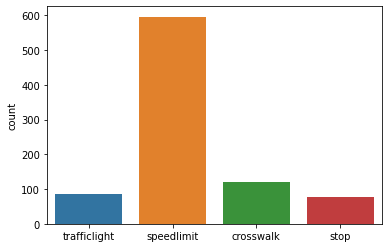

In [ ]:
sns.countplot(labels)

In [ ]:
len(labels)
class_weights={0:64,1:1,2:55,3:60}

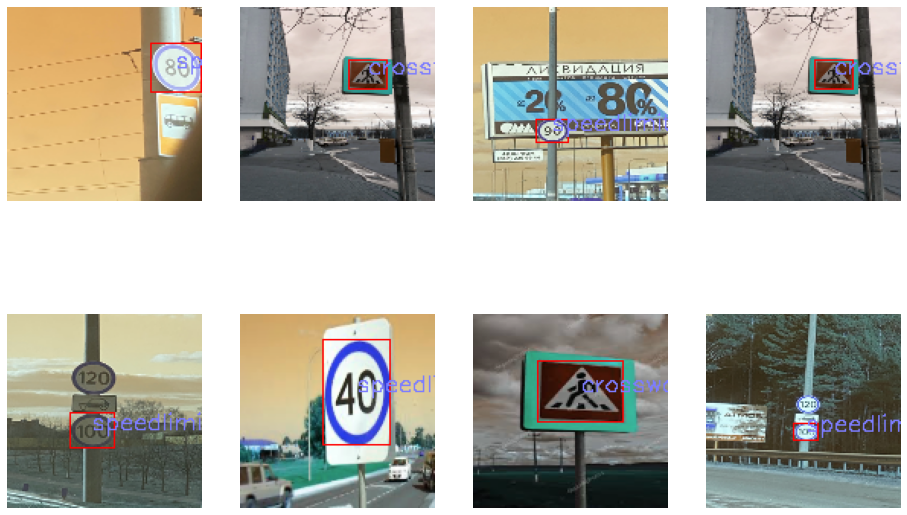

In [ ]:
import random
# font=cv2.FONT_HERSHEY_SIMPLEX
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,50)
fontScale              = 0.5
fontColor              = (125,125,255)
thickness              = 1
lineType               = 1
plt.figure(figsize=(16,16))
for i in range(8):
  ran=random.randint(1,len(y))
  # print(y[ran])
  plt.subplot(3,4,i+1)
  plt.axis('off')
  # print(ran)
  res=cv2.rectangle(img_data[ran],(y[ran][0],y[ran][1]),(y[ran][2],y[ran][-1]),(255,0,0),1)
  # print(cv2.putText(img_data[ran],y[ran][0],(y[ran][1],y[ran][2]),fontface=font))
  cv2.putText(res,labels[ran], 
    ((y[ran][0]+y[ran][2])//2,((y[ran][1]+y[ran][-1])//2)), 
    font, 
    fontScale,
    fontColor,
    thickness,
    lineType)
  plt.imshow(res)  

In [ ]:
img_data=img_data/255
y=np.array(y)/255
img_data[0]

array([[[0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        ...,
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451]],

       [[0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        ...,
        [0.10588235, 0.08627451, 0.09019608],
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451]],

       [[0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        [0.10588235, 0.08235294, 0.08627451],
        ...,
        [0.10980392, 0.08627451, 0.09019608],
        [0.10980392, 0.08627451, 0.09019608],
        [0.10980392, 0.08627451, 0.09019608]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
enc=LabelEncoder()
labels_enc=enc.fit_transform(labels)
# labels_enc=to_categorical(labels_enc)
labels_enc

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1,
       0, 1, 3, 2, 1, 1, 1, 3, 0, 0, 2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1,
       0, 0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 1, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 3, 1, 0, 3, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 0, 3, 1, 1, 1, 2, 0, 3, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train_images,X_test_images,y_train_labels,y_test_labels,y_train_annot,y_test_annot=train_test_split(img_data,labels_enc,y,random_state=42,test_size=0.2,stratify=labels_enc)
print(f'X_train shape is {X_train_images.shape}, X test shape is {X_test_images.shape}')

X_train shape is (701, 128, 128, 3), X test shape is (176, 128, 128, 3)


In [ ]:
y_train_labels.shape, y_train_annot.shape

((701,), (701, 4))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense,Flatten,Conv2D,AveragePooling2D
from tensorflow.keras import Model

model=Sequential()
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in vgg.layers[:19]:
  layer.trainable=False
model.add(vgg)
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
# model=Model(inputs=inception.input,outputs=[class_output,loc_output])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # depends on what you care most about

model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 512)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20,032,580
Trainable params: 4,727,812
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 3)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(X_train_images,y_train_labels,validation_data=(X_test_images,y_test_labels),epochs=10,batch_size=32,callbacks=callbacks_list,class_weight=class_weights)

Epoch 1/10
22/22 [==============================] - 19s 328ms/step - loss: 27.6809 - accuracy: 0.1569 - val_loss: 2.3744 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 2/10
22/22 [==============================] - 4s 163ms/step - loss: 15.4384 - accuracy: 0.2340 - val_loss: 2.0694 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - 4s 164ms/step - loss: 11.2820 - accuracy: 0.2853 - val_loss: 1.7792 - val_accuracy: 0.3011 - lr: 0.0010
Epoch 4/10
22/22 [==============================] - 4s 163ms/step - loss: 6.2474 - accuracy: 0.3695 - val_loss: 1.3525 - val_accuracy: 0.3864 - lr: 0.0010
Epoch 5/10
22/22 [==============================] - 4s 164ms/step - loss: 3.1796 - accuracy: 0.4922 - val_loss: 1.3495 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 6/10
22/22 [==============================] - 4s 173ms/step - loss: 2.0281 - accuracy: 0.5920 - val_loss: 1.3685 - val_accuracy: 0.5341 - lr: 0.0010
Epoch 7/10
22/22 [==============================] - 4s 167ms/step 

Text(0.5, 1.0, 'val accuracy')

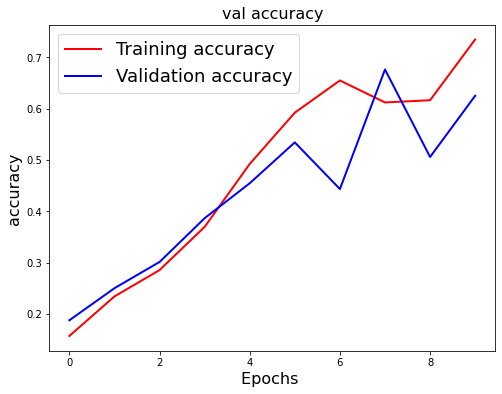

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
def non_max_suppression(boxes, overlapThresh= .5):
    '''This image was taken from PyImageSearch... again cannot thank that guy enough'''
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    # initialize the list of picked indexes	
    pick = []
    # grab the coordinates of the bounding boxes
    x1, y1, x2, y2 = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]    
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1, yy1, xx2, yy2 = np.maximum(x1[i], x1[idxs[:last]]), np.maximum(y1[i], y1[idxs[:last]]), np.minimum(x2[i], x2[idxs[:last]]), np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w, h = np.maximum(0, xx2 - xx1 + 1), np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))
    # return only the bounding boxes that were picked using the
    # integer data type
    return pick

In [ ]:
from tensorflow.keras.preprocessing import image 

def get_image_value(path, dim): 
    '''This function will read an image and convert to a specified version and resize depending on which algorithm is being used. '''
    img = image.load_img(path, target_size = dim)
    img = image.img_to_array(img)
    return img/255

In [ ]:
enc.classes_

array(['crosswalk', 'speedlimit', 'stop', 'trafficlight'], dtype='<U12')

In [ ]:
from google.colab.patches import cv2_imshow
def get_img_prediction_bounding_box(path, model, dim):
    '''This function will create a bounding box over what it believes is a weapon given the image path, dimensions, and model used to detect the weapon.  Dimensions can be found within the Var.py file.  This function is still being used as I need to apply non-max suppresion to create only one bounding box'''
    img = get_image_value(path, dim)   
    img = img.reshape(1, img.shape[0], img.shape[1], 3)
    pred = model.predict(img)[0]
    category_dict = {0: 'crosswalk', 1: 'speedlimit', 2: 'stop',3:'trafficlight'}
    cat_index = np.argmax(pred)
    cat = category_dict[cat_index]
    print(f'{path}\t\tPrediction: {cat}\t{int(pred.max()*100)}% Confident')

    #speed up cv2
    cv2.setUseOptimized(True)
    cv2.setNumThreads(10) #change depending on your computer
    img = cv2.imread(path)
    clone = img.copy() 
    clone2 = img.copy()
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # ss.switchToSelectiveSearchFast()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()

    rects = ss.process() 
    windows = []
    locations = []
    print(f'Creating Bounding Boxes for {path}')
    for x, y, w,h in rects[:1001]: 
        startx, starty, endx, endy = x, y, x+w, y+h 
        roi = img[starty:endy, startx:endx]
        roi = cv2.resize(roi, dsize =dim, interpolation = cv2.INTER_CUBIC)
        windows.append(roi)
        locations.append((startx, starty, endx, endy))
    windows = np.array(windows)
    windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 3)
    windows = np.array(windows)
    locations = np.array(locations)
    predictions = model.predict(windows)
    nms = non_max_suppression(locations)
    bounding_cnt = 0
    for idx in nms:
        if np.argmax(predictions[idx]) != cat_index: 
            continue
        startx, starty, endx, endy = locations[idx]
        cv2.rectangle(clone, (startx, starty), (endx, endy), (0,0,255), 2)
        text = f'{category_dict[np.argmax(predictions[idx])]}: {int(predictions[idx].max()*100)}%'
        cv2.putText(clone, text, (startx, starty+15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,0),2)
        bounding_cnt += 1

    if bounding_cnt == 0: 
        pred_idx= [idx for idx, i in enumerate(predictions) if np.argmax(i) == cat_index]
        cat_locations = np.array([locations[i] for i in pred_idx])
        nms = non_max_suppression(cat_locations)
        if len(nms)==0:
            cat_predictions = predictions[:,cat_index]
            pred_max_idx = np.argmax(cat_predictions)
            pred_max = cat_predictions[pred_max_idx]
            pred_max_window = locations[pred_max_idx]
            startx, starty, endx, endy = pred_max_window
            cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,0,255),2)
            text = f'{category_dict[cat_index]}: {int(pred_max*100)}%'
            cv2.putText(clone, text, (startx, starty+15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,0),2)
        for idx in nms: 
            startx, starty, endx, endy = cat_locations[idx]
            cv2.rectangle(clone, (startx, starty), (endx, endy), (0,0,255), 2)
            text = f'{category_dict[np.argmax(predictions[pred_idx[idx]])]}: {int(predictions[pred_idx[idx]].max()*100)}%'
            cv2.putText(clone, text, (startx, starty+15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,0),2)        
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    cv2_imshow(np.hstack([clone, clone2]))
    cv2.waitKey(0)
    ss.clear()
    return predictions

In [ ]:
files.upload()

Saving traffic.jpg to traffic.jpg


{'traffic.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00\x94Exif\x00\x00II*\x00\x08\x00\x00\x00\x02\x00\x0e\x01\x02\x00f\x00\x00\x00&\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00blurred view of city traffic with traffic lights, in the foreground a traffic light with a green light\xff\xe1\x05\x85http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/">\n\t<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n\t\t<rdf:Description rdf:about="" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:Iptc4xmpCore="http://iptc.org/std/Iptc4xmpCore/1.0/xmlns/"   xmlns:GettyImagesGIFT="http://xmp.gettyimages.com/gift/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:plus="http://ns.useplus.org/ldf/xmp/1.0/"  xmlns:iptcExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" xmlns:xmpRights="http://ns.adobe.com/xap/1.0/rights/" photoshop:Cr

images/road105.png		Prediction: speedlimit	99% Confident
Creating Bounding Boxes for images/road105.png
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


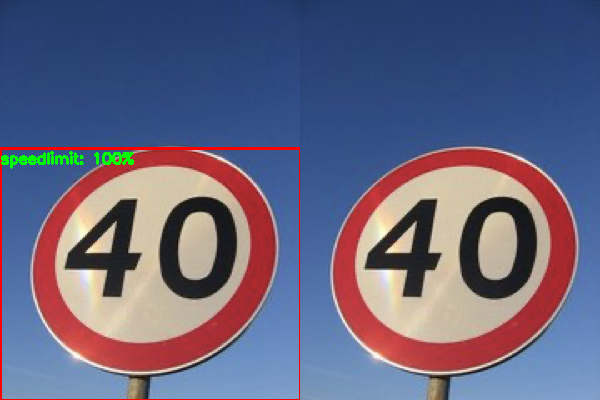

In [ ]:
test_path='images/road105.png' # enter the image name to test
pred = get_img_prediction_bounding_box(test_path, model, dim = (img_size,img_size))
# high quality will make the predictions slower

In [ ]:
y_class = model.predict(X_test_images)
# print(y_class)
y_pred_classes=np.argmax(y_class,axis=1)
# print(y_pred_classes)


array([2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 2, 3, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 0, 1, 0, 3, 1, 1,
       3, 1, 0, 1, 1, 3, 1, 0, 2, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2])

Accuracy : 53.40909090909091


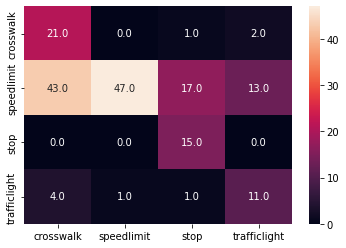

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
class_names=enc.classes_
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')